In [2]:
pip install pyttsx3


In [15]:
!sudo apt install espeak-ng

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  espeak-ng-data libespeak-ng1 libpcaudio0 libsonic0
The following NEW packages will be installed:
  espeak-ng espeak-ng-data libespeak-ng1 libpcaudio0 libsonic0
0 upgraded, 5 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,526 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libpcaudio0 amd64 1.1-6build2 [8,956 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libsonic0 amd64 0.2.0-11build1 [10.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 espeak-ng-data amd64 1.50+dfsg-10ubuntu0.1 [3,956 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libespeak-ng1 amd64 1.50+dfsg-10ubuntu0.1 [207 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 espeak-ng amd64 1.50+dfsg-1

In [17]:
!sudo apt install libespeak1

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  espeak-data libportaudio2
The following NEW packages will be installed:
  espeak-data libespeak1 libportaudio2
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,307 kB of archives.
After this operation, 2,927 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 espeak-data amd64 1.48.15+dfsg-3 [1,085 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libespeak1 amd64 1.48.15+dfsg-3 [156 kB]
Fetched 1,307 kB in 0s (4,640 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 3.)
debconf: fall

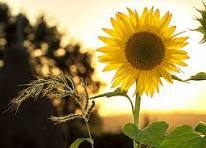

In [27]:
from PIL import Image
from IPython.display import display

# Open the image using PIL
image = Image.open("/content/download.jpg")

# Display the image using display
display(image)

In [18]:
import torch
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
from PIL import Image
import pyttsx3

# Load pre-trained model, processor, and tokenizer
model_name = "nlpconnect/vit-gpt2-image-captioning"
model = VisionEncoderDecoderModel.from_pretrained(model_name)
processor = ViTImageProcessor.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

def generate_image_description(image_path, max_length=50):
    """Generate a detailed description of the image."""
    # Load and preprocess the image
    image = Image.open(image_path).convert("RGB")
    pixel_values = processor(images=image, return_tensors="pt").pixel_values

    # Generate captions
    output_ids = model.generate(
        pixel_values,
        max_length=max_length,
        num_beams=5,
        early_stopping=True
    )
    caption = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    return caption

def narrate_description(description):
    """Use a text-to-speech engine to narrate the image description."""
    engine = pyttsx3.init()
    engine.setProperty('rate', 150)  # Set speech speed
    engine.say(description)
    engine.runAndWait()

image_path = "/download.jpg"  # Path to the image file
print("Loading image from path:", image_path)

try:
    description = generate_image_description(image_path) # Only one value is returned, so assign it to description
    print("Generated Description:", description)

    # Open the image using PIL
    image = Image.open(image_path)
    image.show()  # Display the image

    narrate_description(description)
except FileNotFoundError:
    print("Error: Image file not found. Please check the file path.")


Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.46.3"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_rang

Loading image from path: /download.jpg
Generated Description: a yellow flower in the middle of a sunny day 


In [20]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [21]:
import torch
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
from PIL import Image
import pyttsx3
import streamlit as st

# Load pre-trained model, processor, and tokenizer
model_name = "nlpconnect/vit-gpt2-image-captioning"
model = VisionEncoderDecoderModel.from_pretrained(model_name)
processor = ViTImageProcessor.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

def generate_image_description(image, max_length=50, num_sentences=3):
    """Generate a detailed description of the image."""
    # Preprocess the image
    pixel_values = processor(images=image, return_tensors="pt").pixel_values

    # Generate captions
    output_ids = model.generate(
        pixel_values,
        max_length=max_length,
        num_beams=5,
        early_stopping=True
    )
    caption = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    # Limit to the desired number of sentences
    sentences = caption.split('. ')
    return '. '.join(sentences[:num_sentences]) + '.' if sentences else caption

def narrate_description(description):
    """Use a text-to-speech engine to narrate the image description."""
    engine = pyttsx3.init()
    engine.setProperty('rate', 150)  # Set speech speed
    engine.say(description)
    engine.runAndWait()

# Streamlit App
st.title("Image Description Generator with Voice Assistant")
st.write("Upload an image and generate a description with an optional voice narration.")

# File uploader
uploaded_file = st.file_uploader("Choose an image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Display the uploaded image
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption="Uploaded Image", use_column_width=True)

    # Options for description
    num_sentences = st.slider("Number of sentences in the description", 1, 5, 3)

    # Generate description
    if st.button("Generate Description"):
        with st.spinner("Generating description..."):
            description = generate_image_description(image, max_length=50, num_sentences=num_sentences)
        st.success("Description Generated!")
        st.write(description)

        # Voice assistant option
        if st.button("Narrate Description"):
            narrate_description(description)


Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.46.3"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_rang

In [24]:
!streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.138.129.177:8501

  Stopping...
Traceback (most recent call last):
  File "/usr/lib/python3.10/_weakrefset.py", line 39, in _remove
OSError: Signal 2 ignored due to race condition
